<a href="https://colab.research.google.com/github/Sheila-Otieno/Machine-learning/blob/main/kmeans_cluster_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving exam.csv to exam (2).csv


In [ ]:
data = pd.read_csv("exam.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#check for null values
data.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,False,False,False,False,False,False,False,False,False,False,True,False
537573,False,False,False,False,False,False,False,False,False,False,False,False
537574,False,False,False,False,False,False,False,False,False,False,True,False
537575,False,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
#fil null values with zero
data.fillna(0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,0.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,0.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,0.0,0.0,7172


In [ ]:
#Calculate average Purchase group by Gender
data.groupby("Gender")[['Purchase']].mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


In [ ]:
#Visualize the distribution of the total Purchase, grouped by Age
num = data.groupby("Age")[['Purchase']].count()
num

,Purchase
Age,
0-17,14707
18-25,97634
26-35,214690
36-45,107499
46-50,44526
51-55,37618
55+,20903


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77043e40f0>]],
      dtype=object)

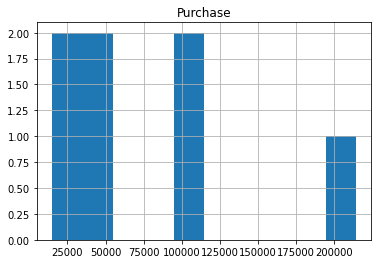

In [ ]:
#distribution of data
num.hist()

In [ ]:
##Find the top 5 products with the highest demand.
data.sort_values(by="Purchase", ascending=False).head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,NaN,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,NaN,23961
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,NaN,23961
349658,1005848,P00119342,M,51-55,20,A,0,1,10,13.0,NaN,23960
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16.0,NaN,23960


In [ ]:
#top five products with highest demand
high_price = data["Product_ID"].max()
high_price

'P0099942'

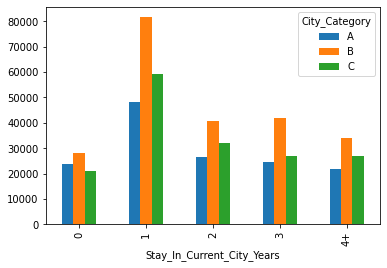

In [ ]:
#Visualize total Purchase grouped by Years stay in current city and City category
data.groupby(['Stay_In_Current_City_Years','City_Category'])['Purchase'].count().unstack('City_Category').plot.bar()

In [ ]:
#create an elbow method to calculate the best number of clusters to choose from
def elbow_method(X):
    """
    Plot average distance from observations from the cluster centroid
    to use the Elbow Method to identify number of clusters to choose.
    """
    distances=[]
    for k in np.arange(2,10):
        model = KMeans(k).fit(X)
        distances.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.figure()
    plt.plot(np.arange(2,10), distances)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Distance')
    plt.title('Selecting k with the Elbow Method')
    plt.show()

In [ ]:
#converts categorical values into dummy variables
data1 = pd.get_dummies(data)

In [ ]:
#call the elbow method
elbow_method(data1)

In [ ]:
elbow_method(X)
# Elbow method showed 3 or 5 clusters , lets, choose 3
print("Number of Clusters Selected from Elbow Method:", 3)
model = KMeans(3).fit(X) # the clustering model
print('\n\n\t\tModel Parameters\n{}'.format(model))